<a href="https://colab.research.google.com/github/ghiyaa/proj261/blob/main/Models_with_four_hidden_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# please provide the path where HIGGS_train.csv is located

df = pd.read_csv('/content/gdrive/My Drive/proj261/HIGGS_train.csv', low_memory = False, header = None)

In [ ]:
import sys
# here provide the path where preprocessing_module is located
sys.path.append('/content/gdrive/MyDrive/proj261')

from preprocessing_module import Preprocessing
# Cleaning the data
X, y = Preprocessing(df)
print(X, y)

[260692]
0           1.0
1          1.75
2         0.442
3           1.5
4         0.708
5         -1.28
6          1.13
7         0.902
8     -1.92E-01
9          2.17
10        0.562
11        0.219
12        0.864
13          0.0
14        0.492
15        0.317
16       -0.221
17          NaN
18        0.508
19         1.45
20         1.58
21     0.00E+00
22        0.718
23         1.02
24        0.989
25        0.732
26        0.266
27        0.891
28        0.758
Name: 260692, dtype: object
"1.01" 261026 8
[261025]
error 490959 21
[261025, 490958]
s 490960 21
[261025, 490958, 490959]
[[0.869 -0.635 0.226 ... 0.722 0.989 0.877]
 [0.908 0.329 0.359 ... 0.78 0.992 0.798]
 [0.799 1.47 -1.64 ... 0.803 0.866 0.78]
 ...
 [1.07 0.364 0.344 ... 0.852 0.908 0.789]
 [1.18 -0.173 -1.46 ... 0.745 0.741 0.728]
 [0.771 -0.133 -1.02 ... 0.51 1.04 0.905]] [1. 1. 1. ... 1. 1. 0.]


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Split the data into training 95.07%, validation 2.43% and test 2.5% sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.025, random_state = 42)
X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size = 0.025, random_state = 42)

# Print the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (570371, 28) (570371,)
Test set shape: (15000, 28) (15000,)


In [ ]:
# Feature scaling: Standard Normalization

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
# Transform the test data using the parameters learned from the training data
X_test = scaler.transform(X_test)
# Transform the validation data using the parameters learned from the training data
X_val = scaler.transform(X_val)

In [ ]:
# Model 5: using neural networks with 4 hidden layers using ReLU, with dropout and epochs = 20

# Build the model
model = keras.Sequential([
    layers.Dense(300, activation='relu', input_shape=(28,)),
    layers.Dropout(0.2),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.12),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.12),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Use early stopping as a regularization technique to avoid overfitting
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10)
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor = 'val_accuracy', mode = 'auto')

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs = 20, batch_size = 2048, verbose = 1, validation_data = (X_val, y_val), callbacks = [es,mc])

# Compute the training, validation, and testing accuracies of the classifier
loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=2)
loss_test, accuracy_test   = model.evaluate(X_test, y_test, verbose=2)
loss_val, accuracy_val     = model.evaluate(X_val, y_val, verbose=2)

print('Accuracy on train set:', accuracy_train)
print('Accuracy on test set:', accuracy_test)
print('Accuracy on validation set:', accuracy_val)

Epoch 1/20
279/279 [==============================] - 53s 130ms/step - loss: 0.5983 - accuracy: 0.6740 - val_loss: 0.5614 - val_accuracy: 0.7046
Epoch 2/20
279/279 [==============================] - 37s 133ms/step - loss: 0.5528 - accuracy: 0.7146 - val_loss: 0.5362 - val_accuracy: 0.7248
Epoch 3/20
279/279 [==============================] - 36s 130ms/step - loss: 0.5361 - accuracy: 0.7261 - val_loss: 0.5244 - val_accuracy: 0.7322
Epoch 4/20
279/279 [==============================] - 36s 129ms/step - loss: 0.5275 - accuracy: 0.7323 - val_loss: 0.5185 - val_accuracy: 0.7355
Epoch 5/20
279/279 [==============================] - 37s 133ms/step - loss: 0.5205 - accuracy: 0.7362 - val_loss: 0.5121 - val_accuracy: 0.7379
Epoch 6/20
279/279 [==============================] - 36s 128ms/step - loss: 0.5153 - accuracy: 0.7400 - val_loss: 0.5084 - val_accuracy: 0.7409
Epoch 7/20
279/279 [==============================] - 38s 135ms/step - loss: 0.5116 - accuracy: 0.7425 - val_loss: 0.5040 - val_ac

In [ ]:
# Download ann_visualizer (if it doesn't already exist)
!pip3 install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4179 sha256=de0ecc020cb7fb9737dc5d956365b96b3794a195c58ad560ea29e41f8a4a7047
  Stored in directory: /root/.cache/pip/wheels/2d/d8/86/67f4a249969eaaa31c6df569f4ebfa84634fae3af2c627107b
Successfully built ann_visualizer


In [ ]:
# Visualize our neural network model
from ann_visualizer.visualize import ann_viz
ann_viz(model, title = "Neural Network Model5", view = True, filename = "model5")

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 300)               8700      
                                                                 
 dropout_8 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 300)               90300     
                                                                 
 dropout_9 (Dropout)         (None, 300)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               90300     
                                                                 
 dropout_10 (Dropout)        (None, 300)               0         
                                                                 
 dense_13 (Dense)            (None, 300)              

Final loss: 0.4879682958126068


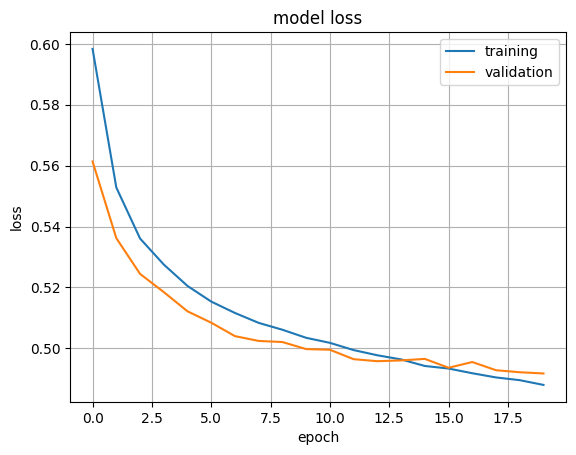

In [ ]:
# Plotting training and validation losses
print(f"Final loss: {history.history['loss'][-1]}")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.grid()
plt.show()

In [ ]:
# Predict the class labels of the test data
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
     y_pred[i] = 1
  else:
     y_pred[i] = 0

# Display confusion matrix and classification report for the test data
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

469/469 [==============================] - 2s 4ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74      6953
         1.0       0.77      0.78      0.77      8047

    accuracy                           0.76     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.76      0.76      0.76     15000

Confusion Matrix:
[[5109 1844]
 [1792 6255]]


In [ ]:
# Model 6: using neural networks with 4 hidden layers using TanH, with dropout and epochs = 20

# Build the model
model = keras.Sequential([
    layers.Dense(300, activation='tanh', input_shape=(28,)),
    layers.Dropout(0.2),
    layers.Dense(300, activation='tanh'),
    layers.Dropout(0.12),
    layers.Dense(300, activation='tanh'),
    layers.Dropout(0.12),
    layers.Dense(300, activation='tanh'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Use early stopping as a regularization technique to avoid overfitting
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10)
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor = 'val_accuracy', mode = 'auto')

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs = 20, batch_size = 2048, verbose = 1, validation_data = (X_val, y_val), callbacks = [es,mc])

# Compute the training, validation, and testing accuracies of the classifier
loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=2)
loss_test, accuracy_test   = model.evaluate(X_test, y_test, verbose=2)
loss_val, accuracy_val     = model.evaluate(X_val, y_val, verbose=2)

print('Accuracy on train set:', accuracy_train)
print('Accuracy on test set:', accuracy_test)
print('Accuracy on validation set:', accuracy_val)

Epoch 1/20
279/279 [==============================] - 75s 263ms/step - loss: 0.6372 - accuracy: 0.6360 - val_loss: 0.5866 - val_accuracy: 0.6836
Epoch 2/20
279/279 [==============================] - 36s 129ms/step - loss: 0.5747 - accuracy: 0.6958 - val_loss: 0.5486 - val_accuracy: 0.7152
Epoch 3/20
279/279 [==============================] - 38s 138ms/step - loss: 0.5514 - accuracy: 0.7137 - val_loss: 0.5383 - val_accuracy: 0.7184
Epoch 4/20
279/279 [==============================] - 36s 130ms/step - loss: 0.5412 - accuracy: 0.7213 - val_loss: 0.5297 - val_accuracy: 0.7272
Epoch 5/20
279/279 [==============================] - 37s 134ms/step - loss: 0.5348 - accuracy: 0.7263 - val_loss: 0.5261 - val_accuracy: 0.7288
Epoch 6/20
279/279 [==============================] - 37s 134ms/step - loss: 0.5308 - accuracy: 0.7283 - val_loss: 0.5198 - val_accuracy: 0.7318
Epoch 7/20
279/279 [==============================] - 38s 136ms/step - loss: 0.5276 - accuracy: 0.7304 - val_loss: 0.5187 - val_ac

In [ ]:
# Visualize our neural network model
from ann_visualizer.visualize import ann_viz
ann_viz(model, title = "Neural Network Model6", view = True, filename = "model6")

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 300)               8700      
                                                                 
 dropout_12 (Dropout)        (None, 300)               0         
                                                                 
 dense_16 (Dense)            (None, 300)               90300     
                                                                 
 dropout_13 (Dropout)        (None, 300)               0         
                                                                 
 dense_17 (Dense)            (None, 300)               90300     
                                                                 
 dropout_14 (Dropout)        (None, 300)               0         
                                                                 
 dense_18 (Dense)            (None, 300)              

Final loss: 0.5056604743003845


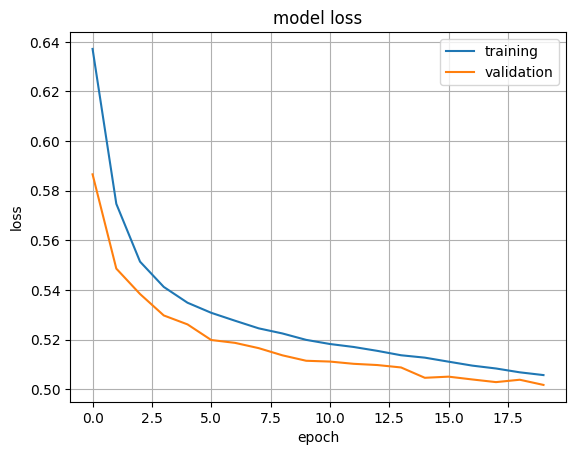

In [ ]:
# Plotting training and validation losses
print(f"Final loss: {history.history['loss'][-1]}")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.grid()
plt.show()

In [ ]:
# Predict the class labels of the test data
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
     y_pred[i] = 1
  else:
     y_pred[i] = 0

# Display confusion matrix and classification report for the test data
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

469/469 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73      6953
         1.0       0.77      0.78      0.77      8047

    accuracy                           0.76     15000
   macro avg       0.75      0.75      0.75     15000
weighted avg       0.75      0.76      0.75     15000

Confusion Matrix:
[[5024 1929]
 [1743 6304]]


In [ ]:
# Model 7: using neural networks with 4 hidden layers using ReLU, without dropout and epochs = 50

# Build the model
model = keras.Sequential([
    layers.Dense(300, activation='relu', input_shape=(28,)),
    layers.Dense(300, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Use early stopping as a regularization technique to avoid overfitting
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10)
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor = 'val_accuracy', mode = 'auto')

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs = 50, batch_size = 2048, verbose = 1, validation_data = (X_val, y_val), callbacks = [es,mc])

# Compute the training, validation, and testing accuracies of the classifier
loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=2)
loss_test, accuracy_test   = model.evaluate(X_test, y_test, verbose=2)
loss_val, accuracy_val     = model.evaluate(X_val, y_val, verbose=2)

print('Accuracy on train set:', accuracy_train)
print('Accuracy on test set:', accuracy_test)
print('Accuracy on validation set:', accuracy_val)

Epoch 1/50
279/279 [==============================] - 28s 98ms/step - loss: 0.5778 - accuracy: 0.6909 - val_loss: 0.5502 - val_accuracy: 0.7149
Epoch 2/50
279/279 [==============================] - 26s 95ms/step - loss: 0.5322 - accuracy: 0.7294 - val_loss: 0.5302 - val_accuracy: 0.7255
Epoch 3/50
279/279 [==============================] - 25s 91ms/step - loss: 0.5153 - accuracy: 0.7403 - val_loss: 0.5203 - val_accuracy: 0.7320
Epoch 4/50
279/279 [==============================] - 27s 98ms/step - loss: 0.5053 - accuracy: 0.7469 - val_loss: 0.5167 - val_accuracy: 0.7361
Epoch 5/50
279/279 [==============================] - 27s 98ms/step - loss: 0.4977 - accuracy: 0.7510 - val_loss: 0.5114 - val_accuracy: 0.7395
Epoch 6/50
279/279 [==============================] - 27s 98ms/step - loss: 0.4915 - accuracy: 0.7555 - val_loss: 0.5082 - val_accuracy: 0.7425
Epoch 7/50
279/279 [==============================] - 25s 90ms/step - loss: 0.4857 - accuracy: 0.7590 - val_loss: 0.5083 - val_accuracy:

In [ ]:
# Visualize our neural network model
from ann_visualizer.visualize import ann_viz
ann_viz(model, title = "Neural Network Model7", view = True, filename = "model7")

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 300)               8700      
                                                                 
 dense_21 (Dense)            (None, 300)               90300     
                                                                 
 dense_22 (Dense)            (None, 300)               90300     
                                                                 
 dense_23 (Dense)            (None, 300)               90300     
                                                                 
 dense_24 (Dense)            (None, 1)                 301       
                                                                 
Total params: 279,901
Trainable params: 279,901
Non-trainable params: 0
_________________________________________________________________


Final loss: 0.40506142377853394


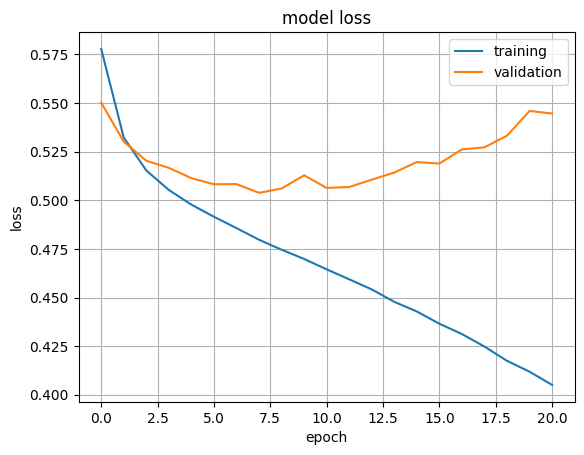

In [ ]:
# Plotting training and validation losses
print(f"Final loss: {history.history['loss'][-1]}")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.grid()
plt.show()

In [ ]:
# Predict the class labels of the test data
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
     y_pred[i] = 1
  else:
     y_pred[i] = 0

# Display confusion matrix and classification report for the test data
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

469/469 [==============================] - 2s 4ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.71      0.72      6953
         1.0       0.76      0.76      0.76      8047

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000

Confusion Matrix:
[[4966 1987]
 [1916 6131]]


In [ ]:
# Model 8: using neural networks with 4 hidden layers using ReLU, with dropout and epochs = 50 (this is the Best Model!!)

# Build the model
model = keras.Sequential([
    layers.Dense(300, activation='relu', input_shape=(28,)),
    layers.Dropout(0.2),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.12),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.12),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Use early stopping as a regularization technique to avoid overfitting
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10)
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor = 'val_accuracy', mode = 'auto')

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs = 50, batch_size = 2048, verbose = 1, validation_data = (X_val, y_val), callbacks = [es,mc])

# Compute the training, validation, and testing accuracies of the classifier
loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=2)
loss_test, accuracy_test   = model.evaluate(X_test, y_test, verbose=2)
loss_val, accuracy_val     = model.evaluate(X_val, y_val, verbose=2)

print('Accuracy on train set:', accuracy_train)
print('Accuracy on test set:', accuracy_test)
print('Accuracy on validation set:', accuracy_val)

Epoch 1/50
279/279 [==============================] - 43s 141ms/step - loss: 0.5986 - accuracy: 0.6732 - val_loss: 0.5551 - val_accuracy: 0.7115
Epoch 2/50
279/279 [==============================] - 31s 112ms/step - loss: 0.5543 - accuracy: 0.7131 - val_loss: 0.5386 - val_accuracy: 0.7227
Epoch 3/50
279/279 [==============================] - 33s 118ms/step - loss: 0.5379 - accuracy: 0.7253 - val_loss: 0.5285 - val_accuracy: 0.7282
Epoch 4/50
279/279 [==============================] - 32s 116ms/step - loss: 0.5282 - accuracy: 0.7314 - val_loss: 0.5209 - val_accuracy: 0.7335
Epoch 5/50
279/279 [==============================] - 32s 115ms/step - loss: 0.5227 - accuracy: 0.7353 - val_loss: 0.5162 - val_accuracy: 0.7369
Epoch 6/50
279/279 [==============================] - 32s 114ms/step - loss: 0.5172 - accuracy: 0.7388 - val_loss: 0.5114 - val_accuracy: 0.7385
Epoch 7/50
279/279 [==============================] - 32s 113ms/step - loss: 0.5132 - accuracy: 0.7412 - val_loss: 0.5091 - val_ac

In [ ]:
# Visualize our neural network model
from ann_visualizer.visualize import ann_viz
ann_viz(model, title = "Neural Network Model8", view = True, filename = "model8")

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               8700      
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               9

Final loss: 0.47274723649024963


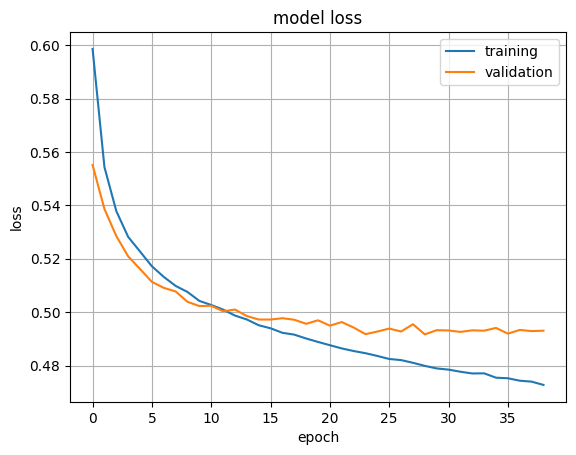

In [ ]:
# Plotting training and validation losses
print(f"Final loss: {history.history['loss'][-1]}")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.grid()
plt.show()

In [ ]:
# Predict the class labels of the test data
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
     y_pred[i] = 1
  else:
     y_pred[i] = 0

# Display confusion matrix and classification report for the test data
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

469/469 [==============================] - 2s 3ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.73      0.74      6953
         1.0       0.77      0.78      0.78      8047

    accuracy                           0.76     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.76      0.76      0.76     15000

Confusion Matrix:
[[5109 1844]
 [1769 6278]]


In [ ]:
# Model 9: using neural networks with 4 hidden layers using ReLU, with dropout and epochs = 70

# Build the model
model = keras.Sequential([
    layers.Dense(300, activation='relu', input_shape=(28,)),
    layers.Dropout(0.2),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.12),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.12),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Use early stopping as a regularization technique to avoid overfitting
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10)
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor = 'val_accuracy', mode = 'auto')

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs = 70, batch_size = 2048, verbose = 1, validation_data = (X_val, y_val), callbacks = [es,mc])

# Compute the training, validation, and testing accuracies of the classifier
loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=2)
loss_test, accuracy_test   = model.evaluate(X_test, y_test, verbose=2)
loss_val, accuracy_val     = model.evaluate(X_val, y_val, verbose=2)

print('Accuracy on train set:', accuracy_train)
print('Accuracy on test set:', accuracy_test)
print('Accuracy on validation set:', accuracy_val)

Epoch 1/70
279/279 [==============================] - 33s 113ms/step - loss: 0.5973 - accuracy: 0.6750 - val_loss: 0.5555 - val_accuracy: 0.7084
Epoch 2/70
279/279 [==============================] - 31s 112ms/step - loss: 0.5535 - accuracy: 0.7142 - val_loss: 0.5366 - val_accuracy: 0.7262
Epoch 3/70
279/279 [==============================] - 32s 115ms/step - loss: 0.5377 - accuracy: 0.7254 - val_loss: 0.5249 - val_accuracy: 0.7303
Epoch 4/70
279/279 [==============================] - 32s 115ms/step - loss: 0.5280 - accuracy: 0.7315 - val_loss: 0.5187 - val_accuracy: 0.7353
Epoch 5/70
279/279 [==============================] - 31s 113ms/step - loss: 0.5215 - accuracy: 0.7355 - val_loss: 0.5134 - val_accuracy: 0.7402
Epoch 6/70
279/279 [==============================] - 31s 112ms/step - loss: 0.5164 - accuracy: 0.7389 - val_loss: 0.5109 - val_accuracy: 0.7383
Epoch 7/70
279/279 [==============================] - 31s 112ms/step - loss: 0.5127 - accuracy: 0.7416 - val_loss: 0.5073 - val_ac

In [ ]:
# Visualize our neural network model
from ann_visualizer.visualize import ann_viz
ann_viz(model, title = "Neural Network Model9", view = True, filename = "model9")

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 300)               8700      
                                                                 
 dropout_4 (Dropout)         (None, 300)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               90300     
                                                                 
 dropout_5 (Dropout)         (None, 300)               0         
                                                                 
 dense_7 (Dense)             (None, 300)               90300     
                                                                 
 dropout_6 (Dropout)         (None, 300)               0         
                                                                 
 dense_8 (Dense)             (None, 300)              

Final loss: 0.46343502402305603


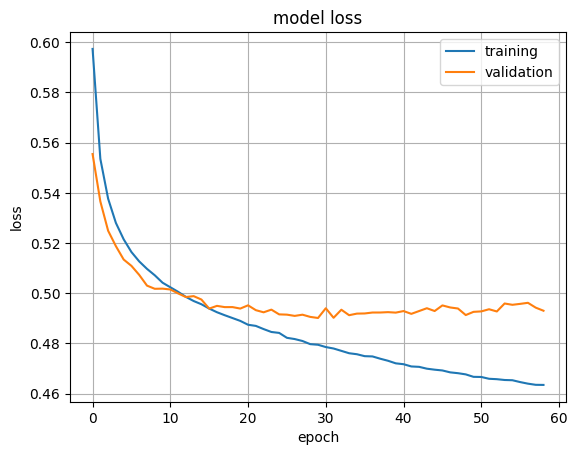

In [ ]:
# Plotting training and validation losses
print(f"Final loss: {history.history['loss'][-1]}")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.grid()
plt.show()

In [ ]:
# Predict the class labels of the test data
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
     y_pred[i] = 1
  else:
     y_pred[i] = 0

# Display confusion matrix and classification report for the test data
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

469/469 [==============================] - 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73      6953
         1.0       0.77      0.78      0.78      8047

    accuracy                           0.76     15000
   macro avg       0.76      0.75      0.75     15000
weighted avg       0.76      0.76      0.76     15000

Confusion Matrix:
[[5039 1914]
 [1737 6310]]


In [ ]:
# Split the data into training 56.25%, validation 18.75% and test 25% sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

# Print the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (337497, 28) (337497,)
Test set shape: (149999, 28) (149999,)


In [ ]:
# Feature scaling: Standard Normalization

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)
# Transform the test data using the parameters learned from the training data
X_test = scaler.transform(X_test)
# Transform the validation data using the parameters learned from the training data
X_val = scaler.transform(X_val)

In [ ]:
# Model 10: using neural networks with 4 hidden layers using ReLU, with dropout, epochs = 50 and 25% split for testing and validation

# Build the model
model = keras.Sequential([
    layers.Dense(300, activation='relu', input_shape=(28,)),
    layers.Dropout(0.2),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.12),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.12),
    layers.Dense(300, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Use early stopping as a regularization technique to avoid overfitting
es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', verbose = 1, patience = 10)
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor = 'val_accuracy', mode = 'auto')

# Compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, epochs = 50, batch_size = 2048, verbose = 1, validation_data = (X_val, y_val), callbacks = [es,mc])

# Compute the training, validation, and testing accuracies of the classifier
loss_train, accuracy_train = model.evaluate(X_train, y_train, verbose=2)
loss_test, accuracy_test   = model.evaluate(X_test, y_test, verbose=2)
loss_val, accuracy_val     = model.evaluate(X_val, y_val, verbose=2)

print('Accuracy on train set:', accuracy_train)
print('Accuracy on test set:', accuracy_test)
print('Accuracy on validation set:', accuracy_val)

Epoch 1/50
165/165 [==============================] - 21s 120ms/step - loss: 0.6151 - accuracy: 0.6575 - val_loss: 0.5713 - val_accuracy: 0.7026
Epoch 2/50
165/165 [==============================] - 20s 120ms/step - loss: 0.5714 - accuracy: 0.6996 - val_loss: 0.5480 - val_accuracy: 0.7172
Epoch 3/50
165/165 [==============================] - 21s 126ms/step - loss: 0.5544 - accuracy: 0.7120 - val_loss: 0.5366 - val_accuracy: 0.7261
Epoch 4/50
165/165 [==============================] - 20s 119ms/step - loss: 0.5438 - accuracy: 0.7206 - val_loss: 0.5289 - val_accuracy: 0.7315
Epoch 5/50
165/165 [==============================] - 21s 130ms/step - loss: 0.5357 - accuracy: 0.7263 - val_loss: 0.5230 - val_accuracy: 0.7355
Epoch 6/50
165/165 [==============================] - 20s 118ms/step - loss: 0.5290 - accuracy: 0.7313 - val_loss: 0.5179 - val_accuracy: 0.7378
Epoch 7/50
165/165 [==============================] - 21s 126ms/step - loss: 0.5248 - accuracy: 0.7345 - val_loss: 0.5154 - val_ac

In [ ]:
# Visualize our neural network model
from ann_visualizer.visualize import ann_viz
ann_viz(model, title = "Neural Network Model10", view = True, filename = "model10")

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 300)               8700      
                                                                 
 dropout_12 (Dropout)        (None, 300)               0         
                                                                 
 dense_16 (Dense)            (None, 300)               90300     
                                                                 
 dropout_13 (Dropout)        (None, 300)               0         
                                                                 
 dense_17 (Dense)            (None, 300)               90300     
                                                                 
 dropout_14 (Dropout)        (None, 300)               0         
                                                                 
 dense_18 (Dense)            (None, 300)              

Final loss: 0.4641629755496979


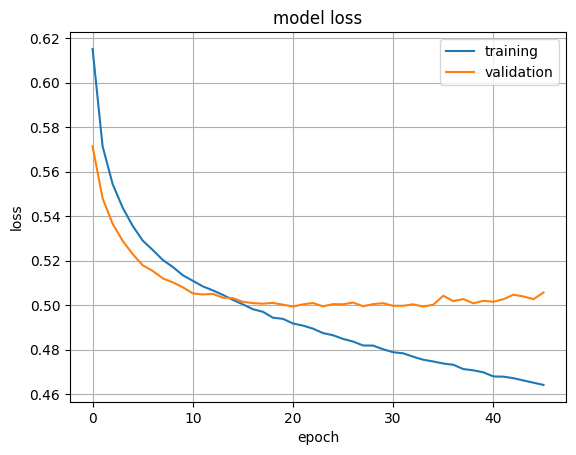

In [ ]:
# Plotting training and validation losses
print(f"Final loss: {history.history['loss'][-1]}")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'])
plt.grid()
plt.show()

In [ ]:
# Predict the class labels of the test data
y_pred = model.predict(X_test)
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
     y_pred[i] = 1
  else:
     y_pred[i] = 0

# Display confusion matrix and classification report for the test data
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

4688/4688 [==============================] - 11s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73     70285
         1.0       0.76      0.78      0.77     79714

    accuracy                           0.75    149999
   macro avg       0.75      0.75      0.75    149999
weighted avg       0.75      0.75      0.75    149999

Confusion Matrix:
[[50666 19619]
 [17745 61969]]
